In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import chi2_contingency
#wrapper methods
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

1. Data preparation
2. Model training
3. Model predicting
4. Performance metrics
5. Model Comparison

# Importing the data set|

In [2]:
sample_submission = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/sample_submission.csv')

In [3]:
na_values_list = ['?', '']
test = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/test.csv', na_values=na_values_list)
test.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
0,499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
1,447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,...,7,250.13,70,794,7,>300,NaN,No,No,[]
2,309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
3,181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
4,359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']


In [4]:
na_values_list = ['?', '']
train = pd.read_csv('https://raw.githubusercontent.com/Sebastiao199/Project_Group18_ML/main/train.csv', na_values=na_values_list)
train.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


# Inicial exploration

In [5]:
train.set_index('encounter_id', inplace = True)
train = pd.DataFrame(train)
train.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),NaN,NaN,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),NaN,NaN,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),NaN,NaN,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),NaN,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),NaN,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


In [6]:
train.describe()

,patient_id,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses
count,7.123600e+04,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000,71236.000000
mean,5.430228e+07,0.369588,0.196249,0.640154,99.611222,4.391024,43.095654,1.340923,15.995452,7.421023
std,3.879585e+07,1.287469,0.910854,1.267271,23.040521,2.988739,19.642919,1.706664,8.122347,1.937809
min,1.350000e+02,0.000000,0.000000,0.000000,60.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.339651e+07,0.000000,0.000000,0.000000,80.000000,2.000000,31.000000,0.000000,10.000000,6.000000
50%,4.530563e+07,0.000000,0.000000,0.000000,100.000000,4.000000,44.000000,1.000000,15.000000,8.000000
75%,8.755837e+07,0.000000,0.000000,1.000000,119.000000,6.000000,57.000000,2.000000,20.000000,9.000000
max,1.895026e+08,42.000000,76.000000,21.000000,139.000000,14.000000,121.000000,6.000000,75.000000,16.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   66166 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 2246 non-null   object
 6   payer_code                             43035 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_specia

In [8]:
train.dtypes

country                                  object
patient_id                                int64
race                                     object
gender                                   object
age                                      object
weight                                   object
payer_code                               object
outpatient_visits_in_previous_year        int64
emergency_visits_in_previous_year         int64
inpatient_visits_in_previous_year         int64
admission_type                           object
medical_specialty                        object
average_pulse_bpm                         int64
discharge_disposition                    object
admission_source                         object
length_of_stay_in_hospital                int64
number_lab_tests                          int64
non_lab_procedures                        int64
number_of_medications                     int64
primary_diagnosis                        object
secondary_diagnosis                     

In [9]:
train['readmitted_binary'].unique()

array(['No', 'Yes'], dtype=object)

In [10]:
train['readmitted_multiclass'].unique()

array(['>30 days', 'No', '<30 days'], dtype=object)

# Missing Values

<Axes: >

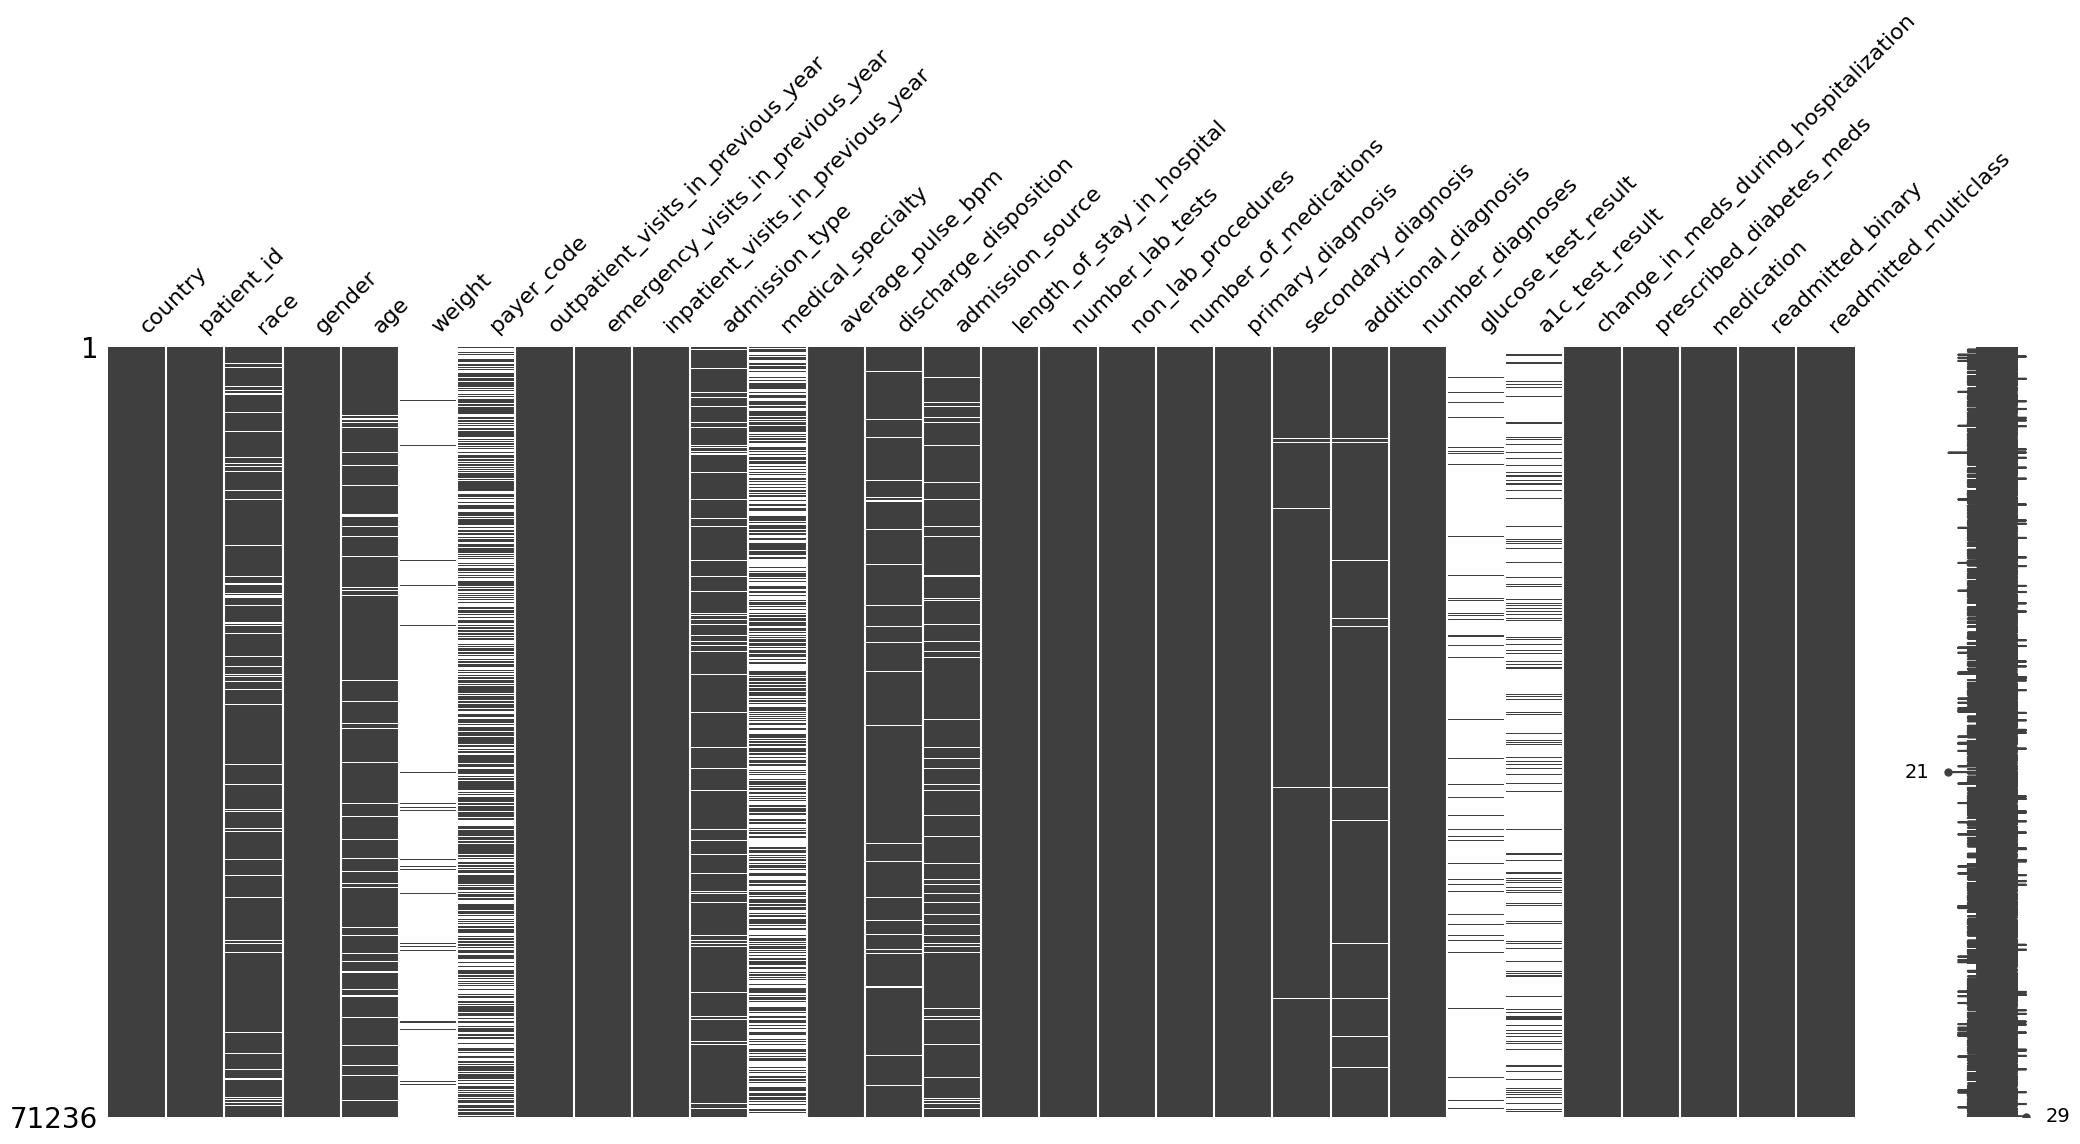

In [11]:
msno.matrix(train)

In [12]:
len(train)

71236

In [13]:
#dropping missing values that represents less than 5% of the data 
threshold = len(train)*0.03
cols_to_drop = train.columns[train.isna().sum() <= threshold]
train.dropna(subset=cols_to_drop, inplace= True)
len(train)

70156

<Axes: >

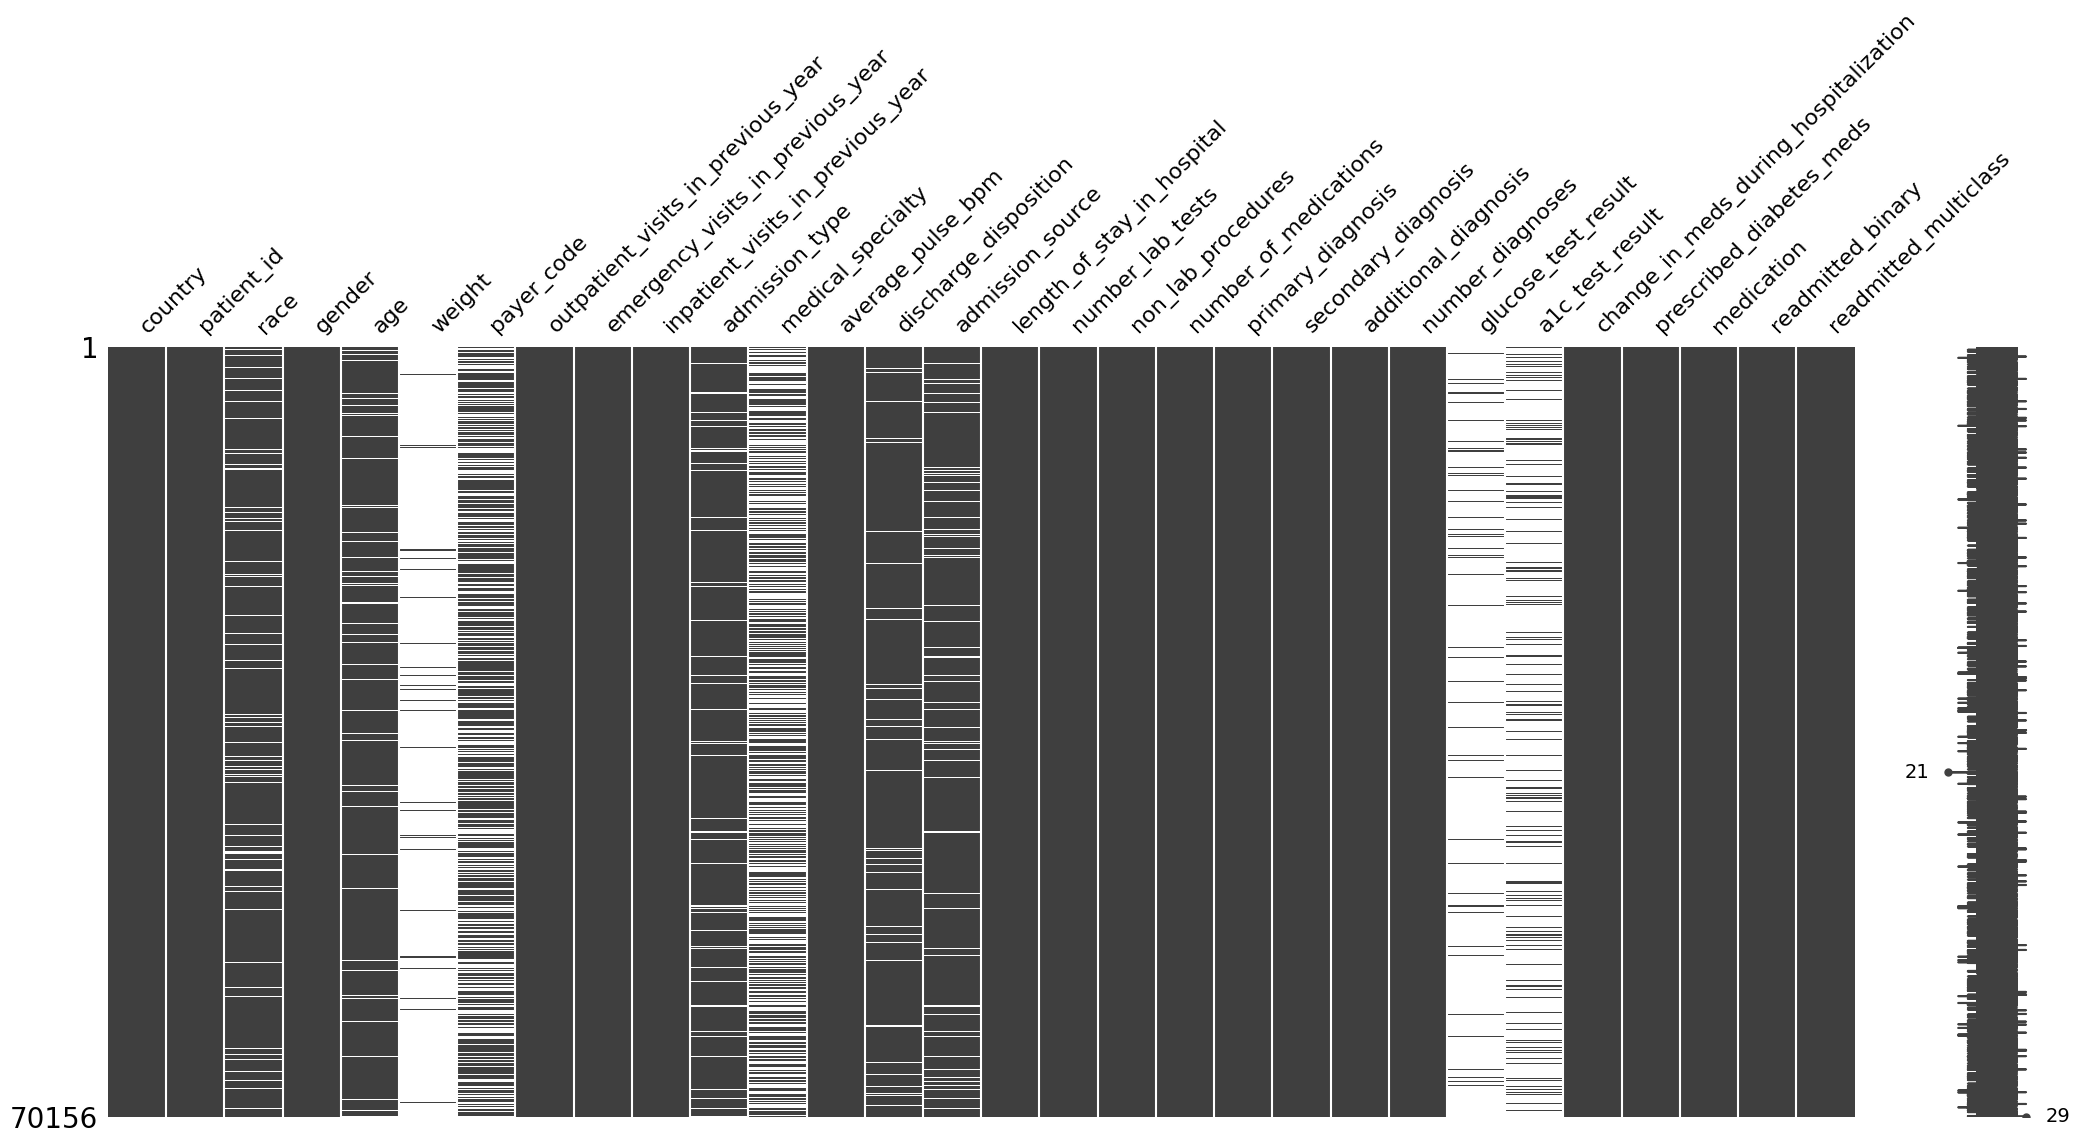

In [14]:
msno.matrix(train)

In [15]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                      4970
gender                                       0
age                                       3509
weight                                   67931
payer_code                               27626
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3641
medical_specialty                        34600
average_pulse_bpm                            0
discharge_disposition                     2550
admission_source                          4649
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

# Droping columns and filling nan

In [16]:
train.drop('weight',axis=1, inplace=True)

In [17]:
print(train['country'].unique())
train.drop('country',axis=1, inplace=True)

['USA']


In [18]:
cols_missing_values= train.columns[train.isna().sum() > 0]
cols_missing_values

Index(['race', 'age', 'payer_code', 'admission_type', 'medical_specialty',
       'discharge_disposition', 'admission_source', 'glucose_test_result',
       'a1c_test_result'],
      dtype='object')

In [19]:
train['race'].fillna('Unknown', inplace=True)
train['medical_specialty'].fillna('Unknown', inplace=True)
train['admission_source'].fillna('Unknown', inplace=True)
train['payer_code'].fillna('None', inplace=True)
train['glucose_test_result'].fillna('None', inplace=True)
train['a1c_test_result'].fillna('None', inplace=True)
train['admission_type'].fillna('Unknown', inplace=True)
train['age'].fillna('Unknown', inplace=True)
train['discharge_disposition'].fillna('Unknown', inplace=True)

In [20]:
train.isna().sum()

patient_id                               0
race                                     0
gender                                   0
age                                      0
payer_code                               0
outpatient_visits_in_previous_year       0
emergency_visits_in_previous_year        0
inpatient_visits_in_previous_year        0
admission_type                           0
medical_specialty                        0
average_pulse_bpm                        0
discharge_disposition                    0
admission_source                         0
length_of_stay_in_hospital               0
number_lab_tests                         0
non_lab_procedures                       0
number_of_medications                    0
primary_diagnosis                        0
secondary_diagnosis                      0
additional_diagnosis                     0
number_diagnoses                         0
glucose_test_result                      0
a1c_test_result                          0
change_in_m

# Categorical features

In [21]:
#shortening the names of the features
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                    'prescribed_diabetes_meds': 'diabetes_meds'
                   }
train = train.rename(columns=new_column_names)

In [22]:
train['race'].value_counts(normalize=True)

race
Caucasian          0.712769
AfricanAmerican    0.177747
Unknown            0.070842
Hispanic           0.018858
Other              0.013955
Asian              0.005830
Name: proportion, dtype: float64

In [23]:
replace_race = {
    'Unknown': 'Other',
    'Hispanic': 'Other',
    'Asian': 'Other'}

train['race'] = train['race'].replace(replace_race)

In [24]:
train['race'].value_counts()

race
Caucasian          50005
AfricanAmerican    12470
Other               7681
Name: count, dtype: int64

In [25]:
train['medication'].value_counts(normalize=True)

medication
['insulin']                                                       0.302882
[]                                                                0.229831
['metformin']                                                     0.044401
['metformin', 'insulin']                                          0.042505
['glipizide']                                                     0.038486
                                                                    ...   
['chlorpropamide', 'glipizide']                                   0.000014
['pioglitazone', 'acarbose', 'insulin', 'glyburide-metformin']    0.000014
['glimepiride', 'rosiglitazone', 'acarbose']                      0.000014
['glipizide', 'pioglitazone', 'acarbose', 'insulin']              0.000014
['glimepiride', 'rosiglitazone', 'miglitol', 'insulin']           0.000014
Name: proportion, Length: 303, dtype: float64

In [26]:
train['medication'] = train['medication'].str.replace('[]', 'no medication')

In [27]:
train['medication'].value_counts(normalize=True)

medication
['insulin']                                                       0.302882
no medication                                                     0.229831
['metformin']                                                     0.044401
['metformin', 'insulin']                                          0.042505
['glipizide']                                                     0.038486
                                                                    ...   
['chlorpropamide', 'glipizide']                                   0.000014
['pioglitazone', 'acarbose', 'insulin', 'glyburide-metformin']    0.000014
['glimepiride', 'rosiglitazone', 'acarbose']                      0.000014
['glipizide', 'pioglitazone', 'acarbose', 'insulin']              0.000014
['glimepiride', 'rosiglitazone', 'miglitol', 'insulin']           0.000014
Name: proportion, Length: 303, dtype: float64

In [29]:
type(train['medication'].iloc[1])

str

In [30]:
train['medication']

encounter_id
533253                            no medication
426224                              ['insulin']
634063               ['glimepiride', 'insulin']
890610                            no medication
654194                            no medication
                          ...                  
660160    ['metformin', 'glyburide', 'insulin']
826429               ['metformin', 'glyburide']
332030                 ['glyburide', 'insulin']
757560                 ['glyburide', 'insulin']
459757                              ['insulin']
Name: medication, Length: 70156, dtype: object

In [31]:
train['number_prescriptions'] = train['medication'].apply(lambda x: 0 if x=='no medication' else len((x.replace("[", "").replace("]", "")).split(',')))
train['number_prescriptions']

encounter_id
533253    0
426224    1
634063    2
890610    0
654194    0
         ..
660160    3
826429    2
332030    2
757560    2
459757    1
Name: number_prescriptions, Length: 70156, dtype: int64

In [32]:
train['medication'] = np.where(train['medication']== 'no medication',0,1)
#no medication = 0 | medication taken=1

In [33]:
train['medication'].value_counts(normalize=True)

medication
1    0.770169
0    0.229831
Name: proportion, dtype: float64

In [34]:
#maybe use label encoder in age
train['age'].unique()

array(['[70-80)', '[50-60)', '[60-70)', '[80-90)', 'Unknown', '[40-50)',
       '[20-30)', '[30-40)', '[90-100)', '[10-20)', '[0-10)'],
      dtype=object)

In [35]:
data = train['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = pd.to_numeric(df['Lower_Age'], errors='coerce', downcast='integer')
df['Upper_Age'] = pd.to_numeric(df['Upper_Age'], errors='coerce', downcast='integer')


df['Midpoint_Age'] = average_age = np.where(df['Lower_Age'].notna() & df['Upper_Age'].notna(),
                       (df['Lower_Age'] + df['Upper_Age']) / 2,
                       np.nan)
df['Midpoint_Age']

encounter_id
533253    75.0
426224    55.0
634063    65.0
890610    65.0
654194    75.0
          ... 
660160    85.0
826429    75.0
332030    65.0
757560    65.0
459757    75.0
Name: Midpoint_Age, Length: 70156, dtype: float64

In [36]:
train['Midpoint_Age'] = df['Midpoint_Age']
train.drop('age', axis=1, inplace=True)
df['Midpoint_Age']

encounter_id
533253    75.0
426224    55.0
634063    65.0
890610    65.0
654194    75.0
          ... 
660160    85.0
826429    75.0
332030    65.0
757560    65.0
459757    75.0
Name: Midpoint_Age, Length: 70156, dtype: float64

#assign the mid value to age
data = train['age']
df = pd.DataFrame(data)

# Extract the lower and upper age values as separate columns
df[['Lower_Age', 'Upper_Age']] = df['age'].str.extract(r'\[(\d+)-(\d+)\)')

df['Lower_Age'] = df['Lower_Age'].astype(int)
df['Upper_Age'] = df['Upper_Age'].astype(int)


df['Midpoint_Age'] = ((df['Lower_Age'] + df['Upper_Age']) / 2).astype('int')
df['Midpoint_Age']

train['Midpoint_Age'] = df['Midpoint_Age']
train.drop('age', axis=1, inplace=True)

In [37]:
train['gender_binary'] = np.where(train['gender']== 'Male',1,0)
#Female = 0 Male = 1
train.drop('gender', axis=1, inplace=True)

In [38]:
train['diabetes_meds_binary'] = np.where(train['diabetes_meds']== 'Yes',1,0)
#No = 0 Yes = 1
train.drop('diabetes_meds', axis=1, inplace=True)

In [39]:
train['change_in_meds_binary'] = np.where(train['change_in_meds']== 'Ch',1,0)
#no change = 0 change = 1
train.drop('change_in_meds', axis=1, inplace=True)

In [40]:
train.head()

,patient_id,race,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,...,glucose_test_result,a1c_test_result,medication,readmitted_binary,readmitted_multiclass,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,None,0,0,2,Emergency,Family/GeneralPractice,127,Discharged to home,...,None,None,0,No,>30 days,0,75.0,0,0,0
426224,29775006,AfricanAmerican,None,0,0,0,Emergency,Unknown,128,Discharged/transferred to a federal health car...,...,None,None,1,No,No,1,55.0,1,1,0
634063,80729253,Caucasian,None,0,0,1,Unknown,Family/GeneralPractice,94,Discharged to home,...,None,None,1,No,No,2,65.0,0,1,1
890610,2919042,AfricanAmerican,MC,0,0,1,Emergency,InternalMedicine,81,Discharged to home,...,None,None,0,No,No,0,65.0,1,0,0
654194,84871971,Caucasian,HM,1,0,0,Elective,Unknown,126,Discharged/transferred to home with home healt...,...,None,None,0,No,>30 days,0,75.0,0,0,0


In [41]:
n_categorical_columns= len(train.select_dtypes(exclude=np.number).columns)
categorical_columns = list(train.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

There are 13 columns with categorical values:

['race', 'payer_code', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'glucose_test_result', 'a1c_test_result', 'readmitted_binary', 'readmitted_multiclass']


In [42]:
train['payer_code'].value_counts(normalize=True)

payer_code
None    0.393780
MC      0.321113
HM      0.060793
SP      0.049333
BC      0.045969
MD      0.034851
CP      0.024731
UN      0.024004
CM      0.019186
OG      0.010263
PO      0.005687
DM      0.005260
CH      0.001440
WC      0.001340
OT      0.000869
MP      0.000770
SI      0.000599
FR      0.000014
Name: proportion, dtype: float64

In [43]:
value_counts = train['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.05].index

train['payer_code'] = train['payer_code'].replace(replace_payer_code, 'Other')

In [44]:
train['payer_code'].value_counts(normalize=True)

payer_code
None     0.393780
MC       0.321113
Other    0.224314
HM       0.060793
Name: proportion, dtype: float64

In [45]:
train['admission_type'].value_counts(normalize=True)

admission_type
Emergency        0.530318
Elective         0.185159
Urgent           0.182707
Unknown          0.051899
Not Available    0.046639
Not Mapped       0.003008
Trauma Center    0.000185
Newborn          0.000086
Name: proportion, dtype: float64

In [46]:
value_counts = train['admission_type'].value_counts(normalize=True)
replace_admission_type = value_counts[value_counts < 0.05].index

train['admission_type'] = train['admission_type'].replace(replace_admission_type, 'Other')
train['admission_type'].value_counts(normalize=True)

admission_type
Emergency    0.530318
Elective     0.185159
Urgent       0.182707
Unknown      0.051899
Other        0.049917
Name: proportion, dtype: float64

In [47]:
train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Unknown                          0.493187
InternalMedicine                 0.144122
Emergency/Trauma                 0.075076
Family/GeneralPractice           0.072866
Cardiology                       0.052725
                                   ...   
Pediatrics-EmergencyMedicine     0.000014
SportsMedicine                   0.000014
Pediatrics-InfectiousDiseases    0.000014
Proctology                       0.000014
Neurophysiology                  0.000014
Name: proportion, Length: 69, dtype: float64

In [48]:
value_counts = train['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index

train['medical_specialty'] = train['medical_specialty'].replace('Unknown', 'Other')

train['medical_specialty'] = train['medical_specialty'].replace(replace_medical_specialty, 'Other')

train['medical_specialty'].value_counts(normalize=True)

medical_specialty
Other                     0.655211
InternalMedicine          0.144122
Emergency/Trauma          0.075076
Family/GeneralPractice    0.072866
Cardiology                0.052725
Name: proportion, dtype: float64

In [49]:
train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                                                                           0.589700
Discharged/transferred to SNF                                                                                0.138905
Discharged/transferred to home with home health service                                                      0.127701
Unknown                                                                                                      0.036348
Discharged/transferred to another short term hospital                                                        0.021110
Discharged/transferred to another rehab fac including rehab units of a hospital .                            0.019742
Expired                                                                                                      0.016150
Discharged/transferred to another type of inpatient care institution                                         0.011574
Not Mapped                        

In [50]:
value_counts = train['discharge_disposition'].value_counts(normalize=True)
replace_discharge_disposition = value_counts[value_counts < 0.05].index

train['discharge_disposition'] = train['discharge_disposition'].replace(replace_discharge_disposition, 'Other')

train['discharge_disposition'].value_counts(normalize=True)

discharge_disposition
Discharged to home                                         0.589700
Other                                                      0.143694
Discharged/transferred to SNF                              0.138905
Discharged/transferred to home with home health service    0.127701
Name: proportion, dtype: float64

In [51]:
train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room                                               0.567606
 Physician Referral                                           0.289369
Unknown                                                       0.066267
Transfer from a hospital                                      0.031330
 Transfer from another health care facility                   0.021110
Clinic Referral                                               0.011018
 Transfer from a Skilled Nursing Facility (SNF)               0.008467
HMO Referral                                                  0.001753
 Not Mapped                                                   0.001525
 Not Available                                                0.001112
 Court/Law Enforcement                                        0.000157
 Transfer from hospital inpt/same fac reslt in a sep claim    0.000114
 Transfer from critial access hospital                        0.000100
 Transfer from Ambulatory Surgery Center                    

In [52]:
value_counts = train['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

train['admission_source'] = train['admission_source'].replace(replace_admission_source, 'Other')
train['admission_source'] = train['admission_source'].replace('Unknown', 'Other')

train['admission_source'].value_counts(normalize=True)

admission_source
 Emergency Room        0.567606
 Physician Referral    0.289369
Other                  0.143024
Name: proportion, dtype: float64

In [53]:
train['primary_diagnosis'].value_counts(normalize=True)

primary_diagnosis
428    0.067963
414    0.065198
786    0.040153
410    0.035806
486    0.035364
         ...   
895    0.000014
691    0.000014
347    0.000014
412    0.000014
299    0.000014
Name: proportion, Length: 686, dtype: float64

In [54]:
train['primary_diagnosis'].unique()

array(['515', '38', '534', '569', '715', '574', '786', '414', '682',
       '425', '486', '507', '584', '282', '959', 'V57', '558', '162',
       '733', '780', '440', '466', '724', '852', '250.8', '531', '278',
       '659', '434', '410', '296', '998', '250.13', '491', '427', 'V58',
       '648', '250.11', '518', '426', '458', '276', '182', '482',
       '250.41', '787', '560', '428', '564', '433', '307', '782', '435',
       '197', '710', '789', '785', '179', '575', '530', '250.81', '263',
       '47', '996', '577', '411', '402', '997', '617', '250.2', '424',
       'V56', '664', '340', '578', '401', '295', '250.7', '732', '250.02',
       '824', '285', '250.1', '250.82', '250.03', '250.6', '532', '784',
       '493', '8', '185', '600', '403', '211', '891', '848', '820', '280',
       '808', '722', '802', '465', '572', '562', '404', '805', '822',
       '250.31', '615', '781', '453', '250.22', '459', '707', '250.12',
       '431', '284', '873', '495', '204', '333', '293', '851', '642'

In [55]:
type(train['primary_diagnosis'].iloc[0])

str

In [56]:
train['primary_diagnosis'].head()

encounter_id
533253    515
426224     38
634063    534
890610    569
654194    715
Name: primary_diagnosis, dtype: object

In [57]:
def diagosis_types_division(x):
    try:
        x = int(x)
        if x <= 139 and x>=1:
            return 1
        elif x <= 239 and x>=140:
            return 2
        elif x <= 279 and x>=240:
            return 3
        elif x <= 289 and x>=280:
            return 4
        elif x <= 319 and x>=290:
            return 5
        elif x <= 389 and x>=320:
            return 6
        elif x <= 459 and x>=390:
            return 7
        elif x <= 519 and x>=460:
            return 8
        elif x <= 579 and x>=520:
            return 9
        elif x <= 629 and x>=580:
            return 10
        elif x <= 679 and x>=630:
            return 11
        elif x <= 709 and x>=680:
            return 12
        elif x <= 739 and x>=710:
            return 13
        elif x <= 759 and x>=740:
            return 14
        elif x <= 779 and x>=760:
            return 15
        elif x <= 799 and x>=780:
            return 16
        elif x <= 999 and x>=800:
            return 17
        else:
            return 18
    except ValueError:
        return 18

train['diagosis_types'] = train['primary_diagnosis'].apply(diagosis_types_division)
train['diagosis_types']

encounter_id
533253     8
426224     1
634063     9
890610     9
654194    13
          ..
660160     7
826429     2
332030     7
757560    17
459757     7
Name: diagosis_types, Length: 70156, dtype: int64

In [58]:
value_counts = train['primary_diagnosis'].value_counts(normalize=True)
replace_primary_diagnosis = value_counts[value_counts < 0.05].index

train['primary_diagnosis'] = train['primary_diagnosis'].replace(replace_primary_diagnosis, 'Other')


train['primary_diagnosis'].value_counts(normalize=True)

primary_diagnosis
Other    0.866840
428      0.067963
414      0.065198
Name: proportion, dtype: float64

In [59]:
train['secondary_diagnosis'].value_counts(normalize=True)

secondary_diagnosis
428     0.066737
276     0.065568
250     0.055676
427     0.050288
401     0.037046
          ...   
908     0.000014
259     0.000014
46      0.000014
240     0.000014
E968    0.000014
Name: proportion, Length: 694, dtype: float64

In [60]:
value_counts = train['secondary_diagnosis'].value_counts(normalize=True)
replace_secondary_diagnosis = value_counts[value_counts < 0.05].index

train['secondary_diagnosis'] = train['secondary_diagnosis'].replace(replace_secondary_diagnosis, 'Other')


train['secondary_diagnosis'].value_counts(normalize=True)

secondary_diagnosis
Other    0.761731
428      0.066737
276      0.065568
250      0.055676
427      0.050288
Name: proportion, dtype: float64

In [61]:
train['secondary_diagosis_types'] = train['secondary_diagnosis'].apply(diagosis_types_division)

In [62]:
train['additional_diagnosis'].value_counts(normalize=True)

additional_diagnosis
250     0.114816
401     0.082345
276     0.051300
428     0.046126
427     0.039369
          ...   
910     0.000014
E892    0.000014
E883    0.000014
E882    0.000014
669     0.000014
Name: proportion, Length: 746, dtype: float64

In [63]:
value_counts = train['additional_diagnosis'].value_counts(normalize=True)
replace_additional_diagnosis = value_counts[value_counts < 0.05].index

train['additional_diagnosis'] = train['additional_diagnosis'].replace(replace_additional_diagnosis, 'Other')


train['additional_diagnosis'].value_counts(normalize=True)

additional_diagnosis
Other    0.751539
250      0.114816
401      0.082345
276      0.051300
Name: proportion, dtype: float64

In [64]:
train['additional_diagosis_types'] = train['additional_diagnosis'].apply(diagosis_types_division)

In [65]:
train['glucose_test_result'].value_counts(normalize=True)

glucose_test_result
None    0.948230
Norm    0.025329
>200    0.014867
>300    0.011574
Name: proportion, dtype: float64

In [66]:
train['a1c_test_result'].value_counts(normalize=True)

a1c_test_result
None    0.834440
>8      0.077841
Norm    0.049404
>7      0.038315
Name: proportion, dtype: float64

In [67]:
#perguntar se posso remover linhas, e se so devo tirar o target depois de limpar os dados todos
target_binary = train['readmitted_binary']
target_binary = np.where(train['readmitted_binary']== 'No',0,1)
target_binary = pd.DataFrame(target_binary)

target_multiclass = train['readmitted_multiclass']  

train.drop(['readmitted_binary','readmitted_multiclass'], axis=1, inplace=True)

In [68]:
train.head()

,patient_id,race,payer_code,outpatient_visits,emergency_visits,inpatient_visits,admission_type,medical_specialty,average_pulse_bpm,discharge_disposition,...,a1c_test_result,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,diagosis_types,secondary_diagosis_types,additional_diagosis_types
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,Caucasian,None,0,0,2,Emergency,Family/GeneralPractice,127,Discharged to home,...,None,0,0,75.0,0,0,0,8,3,18
426224,29775006,AfricanAmerican,None,0,0,0,Emergency,Other,128,Other,...,None,1,1,55.0,1,1,0,1,18,18
634063,80729253,Caucasian,None,0,0,1,Unknown,Family/GeneralPractice,94,Discharged to home,...,None,1,2,65.0,0,1,1,9,18,3
890610,2919042,AfricanAmerican,MC,0,0,1,Emergency,InternalMedicine,81,Discharged to home,...,None,0,0,65.0,1,0,0,9,18,18
654194,84871971,Caucasian,HM,1,0,0,Elective,Other,126,Discharged/transferred to home with home healt...,...,None,0,0,75.0,0,0,0,13,18,18


# Encoding categorical data

In [69]:
# label_encoder = LabelEncoder()
# label_encoder.fit(train['age'])
# train['age'] = label_encoder.transform(train['age'])
# train

In [70]:
enc1 = OrdinalEncoder() 

In [71]:
numerical_columns = train.select_dtypes(include=np.number).columns
categorical_columns = pd.DataFrame(train.drop(numerical_columns, axis=1))

In [72]:
# Columns to one-hot encode
columns_to_encode = ['race', 'payer_code', 'admission_type', 'medical_specialty',
                     'discharge_disposition', 'admission_source']

# Perform one-hot encoding on the specified columns
train_encoded_1 = pd.get_dummies(train[columns_to_encode])
train_encoded_1 = train_encoded_1.astype(int)

In [73]:
# Get the rest of the categorical columns
rest_of_columns = list(set(categorical_columns.columns) - set(columns_to_encode))

# Fit and transform the rest of the categorical columns using enc1
enc1.fit(train[rest_of_columns])
train_encoded_2 = pd.DataFrame(enc1.transform(train[rest_of_columns]), columns=rest_of_columns)

# Set the index of train_encoded_2 to match the index of train
train_encoded_2.set_index(train.index, inplace=True)

# Merge the two encoded DataFrames
train_encoded = pd.concat([train_encoded_1, train_encoded_2], axis=1)
train_encoded

,race_AfricanAmerican,race_Caucasian,race_Other,payer_code_HM,payer_code_MC,payer_code_None,payer_code_Other,admission_type_Elective,admission_type_Emergency,admission_type_Other,...,discharge_disposition_Discharged/transferred to home with home health service,discharge_disposition_Other,admission_source_ Emergency Room,admission_source_ Physician Referral,admission_source_Other,a1c_test_result,glucose_test_result,secondary_diagnosis,primary_diagnosis,additional_diagnosis
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,2.0,2.0,1.0,2.0,3.0
426224,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,2.0,2.0,4.0,2.0,3.0
634063,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,2.0,2.0,4.0,2.0,0.0
890610,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,2.0,2.0,4.0,2.0,3.0
654194,0,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,2.0,2.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0.0,2.0,4.0,2.0,0.0
826429,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0.0,2.0,4.0,2.0,3.0
332030,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,2.0,1.0,4.0,1.0,1.0


In [74]:
train.drop(categorical_columns, axis=1, inplace=True)
train

,patient_id,outpatient_visits,emergency_visits,inpatient_visits,average_pulse_bpm,length_of_stay,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,diagosis_types,secondary_diagosis_types,additional_diagosis_types
encounter_id,,,,,,,,,,,,,,,,,,,
533253,70110,0,0,2,127,2,48,0,20,8,0,0,75.0,0,0,0,8,3,18
426224,29775006,0,0,0,128,14,71,0,25,9,1,1,55.0,1,1,0,1,18,18
634063,80729253,0,0,1,94,6,60,1,22,6,1,2,65.0,0,1,1,9,18,3
890610,2919042,0,0,1,81,6,48,2,9,5,0,0,65.0,1,0,0,9,18,18
654194,84871971,1,0,0,126,6,47,1,15,9,0,0,75.0,0,0,0,13,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,0,1,0,90,7,51,1,18,9,1,3,85.0,0,1,1,7,18,3
826429,4663818,0,0,0,98,9,20,0,9,6,1,2,75.0,0,1,1,2,18,18
332030,23397147,0,2,2,137,5,25,0,24,9,1,2,65.0,0,1,1,7,18,3


In [75]:
train_allnumeric = train.join(train_encoded)
train_allnumeric

,patient_id,outpatient_visits,emergency_visits,inpatient_visits,average_pulse_bpm,length_of_stay,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,...,discharge_disposition_Discharged/transferred to home with home health service,discharge_disposition_Other,admission_source_ Emergency Room,admission_source_ Physician Referral,admission_source_Other,a1c_test_result,glucose_test_result,secondary_diagnosis,primary_diagnosis,additional_diagnosis
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,70110,0,0,2,127,2,48,0,20,8,...,0,0,1,0,0,2.0,2.0,1.0,2.0,3.0
426224,29775006,0,0,0,128,14,71,0,25,9,...,0,1,0,0,1,2.0,2.0,4.0,2.0,3.0
634063,80729253,0,0,1,94,6,60,1,22,6,...,0,0,0,0,1,2.0,2.0,4.0,2.0,0.0
890610,2919042,0,0,1,81,6,48,2,9,5,...,0,0,0,0,1,2.0,2.0,4.0,2.0,3.0
654194,84871971,1,0,0,126,6,47,1,15,9,...,1,0,0,1,0,2.0,2.0,4.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,0,1,0,90,7,51,1,18,9,...,0,0,0,1,0,0.0,2.0,4.0,2.0,0.0
826429,4663818,0,0,0,98,9,20,0,9,6,...,0,1,0,1,0,0.0,2.0,4.0,2.0,3.0
332030,23397147,0,2,2,137,5,25,0,24,9,...,0,1,0,0,1,2.0,1.0,4.0,1.0,1.0


In [76]:
train_allnumeric.dtypes

patient_id                                                                         int64
outpatient_visits                                                                  int64
emergency_visits                                                                   int64
inpatient_visits                                                                   int64
average_pulse_bpm                                                                  int64
length_of_stay                                                                     int64
number_lab_tests                                                                   int64
non_lab_procedures                                                                 int64
number_of_medications                                                              int64
number_diagnoses                                                                   int64
medication                                                                         int32
number_prescriptions 

Data ending - categorical to nmerical
scale data 
the split

# Spliting the data - Binary

In [77]:
train

,patient_id,outpatient_visits,emergency_visits,inpatient_visits,average_pulse_bpm,length_of_stay,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,medication,number_prescriptions,Midpoint_Age,gender_binary,diabetes_meds_binary,change_in_meds_binary,diagosis_types,secondary_diagosis_types,additional_diagosis_types
encounter_id,,,,,,,,,,,,,,,,,,,
533253,70110,0,0,2,127,2,48,0,20,8,0,0,75.0,0,0,0,8,3,18
426224,29775006,0,0,0,128,14,71,0,25,9,1,1,55.0,1,1,0,1,18,18
634063,80729253,0,0,1,94,6,60,1,22,6,1,2,65.0,0,1,1,9,18,3
890610,2919042,0,0,1,81,6,48,2,9,5,0,0,65.0,1,0,0,9,18,18
654194,84871971,1,0,0,126,6,47,1,15,9,0,0,75.0,0,0,0,13,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660160,24531381,0,1,0,90,7,51,1,18,9,1,3,85.0,0,1,1,7,18,3
826429,4663818,0,0,0,98,9,20,0,9,6,1,2,75.0,0,1,1,2,18,18
332030,23397147,0,2,2,137,5,25,0,24,9,1,2,65.0,0,1,1,7,18,3


In [78]:
# Split the data into sets with known and unknown age values
known_age = train_allnumeric[train_allnumeric['Midpoint_Age'].notnull()]
unknown_age = train_allnumeric[train_allnumeric['Midpoint_Age'].isnull()]

# Drop the age column to create the training data for the model
X = known_age.drop(['Midpoint_Age'], axis=1)

# Use the age column as the target variable to predict
y = known_age['Midpoint_Age']

# Fit the model
regr = RandomForestRegressor(random_state=0, n_estimators=200, n_jobs=-1)
regr.fit(X, y)

# Predict the missing ages
predicted_ages = regr.predict(unknown_age.drop(['Midpoint_Age'], axis=1))

# Fill in the missing values
train_allnumeric.loc[(train_allnumeric['Midpoint_Age'].isnull()), 'Midpoint_Age'] = predicted_ages
# train_allnumeric['Midpoint_Age'] = train['Midpoint_Age']

In [79]:
X_train, X_val, y_train, y_val = train_test_split(train_allnumeric,target_binary, 
                                                  test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = target_binary, 
                                                  shuffle = True)

# Scaling

In [80]:
scaler = MinMaxScaler()

scaled_minmax = scaler.fit(X_train,y_train)

minmax_X_train = scaler.transform(X_train)

minmax_X_val = scaler.transform(X_val)

In [81]:
scaler = RobustScaler()

scaled_robust = scaler.fit(X_train,y_train)

robust_X_train = scaler.transform(X_train)

robust_X_val = scaler.transform(X_val)

# Wrapper methods - RFE 

In [82]:
logreg = LogisticRegression()

In [83]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49109 entries, 477959 to 397242
Data columns (total 48 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   patient_id                                                                     49109 non-null  int64  
 1   outpatient_visits                                                              49109 non-null  int64  
 2   emergency_visits                                                               49109 non-null  int64  
 3   inpatient_visits                                                               49109 non-null  int64  
 4   average_pulse_bpm                                                              49109 non-null  int64  
 5   length_of_stay                                                                 49109 non-null  int64  
 6   number_lab_tests     

In [84]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [85]:
labels_train = logreg.predict(X_train)
labels_val = logreg.predict(X_val)

In [86]:
logreg.predict_proba(X_val)

array([[0.67956152, 0.32043848],
       [0.52167037, 0.47832963],
       [0.52588683, 0.47411317],
       ...,
       [0.52402348, 0.47597652],
       [0.77936125, 0.22063875],
       [0.95441568, 0.04558432]])

In [87]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_val, y_val))

0.8877191553483068
0.8877274670974485


In [88]:
X_train = X_train.drop('patient_id', axis=1)

In [89]:
X_val = X_val.drop('patient_id', axis=1)

In [90]:
scaler = StandardScaler().fit(X_train)
scaler_X_train = scaler.transform(X_train)
scaler_X_val = scaler.transform(X_val)
# model_scaler = MLPClassifier().fit(scaler_X_train, y_train)
# model_scaler.score(scaler_X_val, y_val)

In [91]:
robust = RobustScaler().fit(X_train)
robust_X_train = robust.transform(X_train)
robust_X_val = robust.transform(X_val)

In [92]:
min_max_scaler = MinMaxScaler().fit(X_train)
min_max_X_train = min_max_scaler.transform(X_train)
min_max_X_val = min_max_scaler.transform(X_val)

In [ ]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(scaler_X_train,y_train)
    X_val_rfe = rfe.transform(scaler_X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

In [ ]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(robust_X_train,y_train)
    X_val_rfe = rfe.transform(robust_X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

In [ ]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(min_max_X_train,y_train)
    X_val_rfe = rfe.transform(min_max_X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

In [ ]:
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on training data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
        
        #adding mention of variables to keep
        features_to_select = pd.Series(rfe.support_, index = X_train.columns)
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(f"Features to select: \n{features_to_select}")

## RFECV with F1 score

In [99]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Define a scorer for the cross-validation
f1_scorer = make_scorer(f1_score)

# Initialize RFE with a step of 1
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5), scoring=f1_scorer, verbose=10, n_jobs=-1)

# Fit RFE
rfecv.fit(X_train, y_train)

Fitting estimator with 47 features.
Fitting estimator with 46 features.


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
      scoring=make_scorer(f1_score), verbose=10)

In [101]:
# Optimal number of features
nof = rfecv.n_features_
print("Optimum number of features: %d" % nof)

# Score with optimal number of features
high_score = rfecv.cv_results_['mean_test_score'][nof-1]
print("Score with %d features: %f" % (nof, high_score))

# Features to select
features_to_select = X_train.columns[rfecv.support_]
print(f"Features to select: \n{features_to_select}")

# Fit the model on the training data
clf.fit(X_train[features_to_select], y_train)

# Predict the target variable for the validation set
y_val_pred = clf.predict(X_val[features_to_select])

# Calculate the F1 score for the validation set
f1_val = f1_score(y_val, y_val_pred)

print(f"F1 score on validation set: {f1_val}")

Optimum number of features: 45
Score with 45 features: 0.162987
Features to select: 
Index(['outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'average_pulse_bpm', 'length_of_stay', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'number_diagnoses',
       'medication', 'number_prescriptions', 'Midpoint_Age', 'gender_binary',
       'change_in_meds_binary', 'diagosis_types', 'secondary_diagosis_types',
       'additional_diagosis_types', 'race_AfricanAmerican', 'race_Caucasian',
       'race_Other', 'payer_code_HM', 'payer_code_MC', 'payer_code_None',
       'payer_code_Other', 'admission_type_Elective',
       'admission_type_Emergency', 'admission_type_Other',
       'admission_type_Unknown', 'admission_type_Urgent',
       'medical_specialty_Cardiology', 'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_InternalMedicine', 'medical_specialty_Other',
       'discharge_dispositio

‘diabetes_meds_binary’</br>
‘discharge_disposition_Discharged/transferred to home with home health service’  
were the columns removed by the RFECV with DecisionTreeClassifer above

In [119]:
# Initialize the Logistic Regression classifier
clf = LogisticRegression(random_state=0)

# Define a scorer for the cross-validation
f1_scorer = make_scorer(f1_score)

# Initialize RFE with a step of 1
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring=f1_scorer, verbose=10, n_jobs=-1)

# Fit RFE
rfecv.fit(scaler_X_train, y_train)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(random_state=0), n_jobs=-1,
      scoring=make_scorer(f1_score), verbose=10)

In [120]:
# Optimal number of features
nof = rfecv.n_features_
print("Optimum number of features: %d" % nof)

# Score with optimal number of features
high_score = rfecv.cv_results_['mean_test_score'][nof-1]
print("Score with %d features: %f" % (nof, high_score))

# Features to select
features_to_select = X_train.columns[rfecv.support_]
print(f"Features to select: \n{features_to_select}")

scaler_rfe = StandardScaler().fit(X_train[features_to_select])
scaler_X_train_rfe = scaler_rfe.transform(X_train[features_to_select])
scaler_X_val_rfe = scaler_rfe.transform(X_val[features_to_select])

# Fit the model on the training data
clf.fit(scaler_X_train_rfe, y_train)

# Predict the target variable for the validation set
y_val_pred = clf.predict(scaler_X_val_rfe)

# Calculate the F1 score for the validation set
f1_val = f1_score(y_val, y_val_pred)

print(f"F1 score on validation set: {f1_val}")

Optimum number of features: 3
Score with 3 features: 0.024300
Features to select: 
Index(['inpatient_visits', 'diabetes_meds_binary',
       'discharge_disposition_Discharged to home'],
      dtype='object')
F1 score on validation set: 0.029532403609515995


In [106]:
# Initialize the RF classifier
clf = RandomForestClassifier(random_state=0)

# Define a scorer for the cross-validation
f1_scorer = make_scorer(f1_score)

# Initialize RFE with a step of 1
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(5), scoring=f1_scorer, verbose=10, n_jobs=-1)

# Fit RFE
rfecv.fit(X_train, y_train)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
      scoring=make_scorer(f1_score), verbose=10)

In [107]:
# Optimal number of features
nof = rfecv.n_features_
print("Optimum number of features: %d" % nof)

# Score with optimal number of features
high_score = rfecv.cv_results_['mean_test_score'][nof-1]
print("Score with %d features: %f" % (nof, high_score))

# Features to select
features_to_select = X_train.columns[rfecv.support_]
print(f"Features to select: \n{features_to_select}")

# Fit the model on the training data
clf.fit(X_train[features_to_select], y_train)

# Predict the target variable for the validation set
y_val_pred = clf.predict(X_val[features_to_select])

# Calculate the F1 score for the validation set
f1_val = f1_score(y_val, y_val_pred)

print(f"F1 score on validation set: {f1_val}")

Optimum number of features: 3
Score with 3 features: 0.052327
Features to select: 
Index(['average_pulse_bpm', 'number_lab_tests', 'number_of_medications'], dtype='object')
F1 score on validation set: 0.05069551777434313


# Embedded methods - Lasso

In [ ]:
reg = LassoCV()

In [ ]:
reg.fit(X_train, y_train)

In [ ]:
coef = pd.Series(reg.coef_, index = X_train.columns)
coef.sort_values()

In [ ]:
imp_coef = coef.sort_values()
plt.figure(figsize=(8,10))
imp_coef.plot(kind = "barh")
plt.show()

# Evaluating mutiple models at once

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
models = {'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier()}

results = []


for model in models.values():
    kf = KFold(n_splits =10, random_state=42, shuffle=True)
    cv_results= cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

plt.figure(figsize=(12,10))
plt.boxplot(results)
plt.show()

# Encoding - target multiclass

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc2 = OrdinalEncoder() 

In [ ]:
enc2.fit(train)

In [ ]:
target_multiclass = np.array(target_multiclass)
target_multiclass = target_multiclass.reshape(-1,1)
target_multiclass = enc1.fit_transform(target_multiclass)
target_multiclass

In [ ]:
train.head()

In [ ]:
test.head()

# TEST

In [ ]:
#dropping missing values that repesente less than 5% of the data 
threshold= len(test)*0.05 
cols_to_drop = test.columns[test.isna().sum() <= threshold]
test.dropna(subset=cols_to_drop, inplace= True)

In [ ]:
test.drop('weight',axis=1, inplace=True)
test.drop('country',axis=1, inplace=True)

In [ ]:
cols_missing_values= test.columns[test.isna().sum() > 0]
cols_missing_values

In [ ]:
test['race'].fillna('Unknown', inplace=True)
test['medical_specialty'].fillna('Unknown', inplace=True)
test['admission_source'].fillna('Unknown', inplace=True)
test['payer_code'].fillna('None', inplace=True)
test['glucose_test_result'].fillna('None', inplace=True)
test['a1c_test_result'].fillna('None', inplace=True)
test['admission_type'].fillna('Unknown', inplace=True)

In [ ]:
test['age'].fillna('Unknown', inplace=True)

In [ ]:
test.isna().sum()

In [ ]:
new_column_names = {'outpatient_visits_in_previous_year': 'outpatient_visits', 
                    'emergency_visits_in_previous_year': 'emergency_visits',
                    'inpatient_visits_in_previous_year': 'inpatient_visits',
                    'change_in_meds_during_hospitalization': 'change_in_meds',
                    'length_of_stay_in_hospital': 'length_of_stay',
                    'prescribed_diabetes_meds': 'diabetes_meds'
                   }
test = test.rename(columns=new_column_names)

In [ ]:
replace_race = {
    'Unknown': 'Other',
    'Hispanic': 'Other',
    'Asian': 'Other'}

test['race'] = test['race'].replace(replace_race)

In [ ]:
test['race'].value_counts()

In [ ]:
### above ? 

In [ ]:
test['medication'].value_counts(normalize=True)

In [ ]:
test['medication'] = test['medication'].str.replace('[]', 'no medication')

In [ ]:
test['medication'].value_counts(normalize=True)

In [ ]:
test['medication'] = np.where(test['medication']== 'no medication',0,1)

In [ ]:
test['medication'].value_counts(normalize=True)

In [ ]:
train['age'].unique()

In [ ]:
test['gender_binary'] = np.where(test['gender']== 'Male',1,0)
#Female = 0 Male = 1
test.drop('gender', axis=1, inplace=True)
test['diabetes_meds_binary'] = np.where(test['diabetes_meds']== 'Yes',1,0)
#No = 0 Yes = 1
test.drop('diabetes_meds', axis=1, inplace=True)
test['change_in_meds_binary'] = np.where(test['change_in_meds']== 'Ch',1,0)
#no change = 0 change = 1
test.drop('change_in_meds', axis=1, inplace=True)
test.head()

In [ ]:
n_categorical_columns= len(test.select_dtypes(exclude=np.number).columns)
categorical_columns = list(test.select_dtypes(exclude=np.number).columns)

print('There are',n_categorical_columns, 'columns with categorical values:')
print()
print(categorical_columns)

In [ ]:
test['payer_code'].value_counts(normalize=True)

In [ ]:
value_counts = test['payer_code'].value_counts(normalize=True)
replace_payer_code = value_counts[value_counts < 0.10].index

test['payer_code'] = test['payer_code'].replace(replace_payer_code, 'Other')

In [ ]:
test['payer_code'].value_counts(normalize=True)

In [ ]:
test['admission_type'].value_counts(normalize=True)

In [ ]:
value_counts = test['admission_type'].value_counts(normalize=True)
replace_admission_type = value_counts[value_counts < 0.10].index

test['admission_type'] = test['admission_type'].replace(replace_admission_type, 'Other')
test['admission_type'].value_counts(normalize=True)

In [ ]:
test['medical_specialty'].value_counts(normalize=True)

In [ ]:
value_counts = test['medical_specialty'].value_counts(normalize=True)
replace_medical_specialty = value_counts[value_counts < 0.05].index

test['medical_specialty'] = test['medical_specialty'].replace('Unknown', 'Other')

test['medical_specialty'] = test['medical_specialty'].replace(replace_medical_specialty, 'Other')

test['medical_specialty'].value_counts(normalize=True)

In [ ]:
test['discharge_disposition'].value_counts(normalize=True)

In [ ]:
value_counts = test['discharge_disposition'].value_counts(normalize=True)
replace_discharge_disposition = value_counts[value_counts < 0.05].index

test['discharge_disposition'] = test['discharge_disposition'].replace(replace_discharge_disposition, 'Other')

test['discharge_disposition'].value_counts(normalize=True)

In [ ]:
test['admission_source'].value_counts(normalize=True)

In [ ]:
value_counts = test['admission_source'].value_counts(normalize=True)
replace_admission_source = value_counts[value_counts < 0.05].index

test['admission_source'] = test['admission_source'].replace(replace_admission_source, 'Other')
test['admission_source'] = test['admission_source'].replace('Unknown', 'Other')

test['admission_source'].value_counts(normalize=True)

In [ ]:
test['primary_diagnosis'].value_counts(normalize=True)

In [ ]:
value_counts = test['primary_diagnosis'].value_counts(normalize=True)
replace_primary_diagnosis = value_counts[value_counts < 0.05].index

test['primary_diagnosis'] = test['primary_diagnosis'].replace(replace_primary_diagnosis, 'Other')


test['primary_diagnosis'].value_counts(normalize=True)

In [ ]:
test['secondary_diagnosis'].value_counts(normalize=True)

In [ ]:
value_counts = test['secondary_diagnosis'].value_counts(normalize=True)
replace_secondary_diagnosis = value_counts[value_counts < 0.05].index

test['secondary_diagnosis'] = test['secondary_diagnosis'].replace(replace_secondary_diagnosis, 'Other')


test['secondary_diagnosis'].value_counts(normalize=True)

In [ ]:
test['additional_diagnosis'].value_counts(normalize=True)

In [ ]:
value_counts = test['additional_diagnosis'].value_counts(normalize=True)
replace_additional_diagnosis = value_counts[value_counts < 0.05].index

test['additional_diagnosis'] = test['additional_diagnosis'].replace(replace_additional_diagnosis, 'Other')


test['additional_diagnosis'].value_counts(normalize=True)

In [ ]:
test['glucose_test_result'].value_counts(normalize=True)

In [ ]:
test['a1c_test_result'].value_counts(normalize=True)

In [ ]:
#perguntar se posso remover linhas, e se so devo tirar o target depois de limpar os dados todos
# target_binary = test['readmitted_binary']
# target_binary = np.where(test['readmitted_binary']== 'No',0,1)
# target_binary = pd.DataFrame(target_binary)

# target_multiclass = test['readmitted_multiclass']  

# test.drop(['readmitted_binary','readmitted_multiclass'], axis=1, inplace=True)

In [ ]:
test.head()

# Encoding Categorical Data

In [ ]:
enc1 = OrdinalEncoder() 
numerical_columns = test.select_dtypes(include=np.number).columns
categorical_columns = pd.DataFrame(test.drop(numerical_columns, axis=1))
enc1.fit(categorical_columns)
test_encoded = pd.DataFrame(enc1.transform(categorical_columns), columns = categorical_columns.columns)
test_encoded.set_index(test.index, inplace=True)
test_encoded

In [ ]:
test.drop(categorical_columns, axis=1, inplace=True)
test

In [ ]:
test_allnumeric = test.join(test_encoded)
test_allnumeric

In [ ]:
test_allnumeric.dtypes

In [ ]:
# pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
# pipe_hyp = {
#     'scaler__with_mean': [True, False],
#     'knn__n_neighbors': list(range(2,)), 
#     'knn__weights': ['uniform', 'distance']
#     } #'n_neighbors': 18, 'weights': 'distance'

# gs = GridSearchCV(pipe, pipe_hyp, scoring = 'f1')
# gs.fit(X_train, y_train)
# gs.best_params_
# gs.best_score_

In [ ]:
# knn_hyp = {
#     'n_neighbors': list(range(2,5)), 
#     'weights': ['uniform', 'distance']
#     }

# dtc_hyp = {
#     'criterion': ['gini', 'entropy']
#     } 
    
# pipe_hyp = {
#     'scaler__with_mean': [True, False],
#     'knn__n_neighbors': list(range(2,5)), 
#     'knn__weights': ['uniform', 'distance']
#     } 
    
# all_options_dict = {
#     'models': [KNeighborsClassifier(), DecisionTreeClassifier(), Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])],
#     'hyper': [knn_hyp, dtc_hyp, pipe_hyp]
# }

# all_options_dataframe = pd.DataFrame().from_dict(all_options_dict, orient = 'columns')
# all_options_dataframe

In [ ]:
# def grid_search_func(mdl, hyp):
#   gs = GridSearchCV(mdl, hyp, scoring = 'f1')
#   gs.fit(X_train, y_train)
#   return gs.best_params_, gs.best_score_

# all_options_dataframe[['best params', 'best score']] = all_options_dataframe.apply(lambda row: grid_search_func(row['models'], row['hyper']), result_type = 'expand', axis = 1)

In [ ]:
# all_options_dataframe.sort_values('best score', ascending = False)

In [ ]:
# all_options_dataframe['best params']

In [ ]:
# # Define a function to perform grid search
# def grid_search(row):
#     gs = GridSearchCV(row['model'], row['hyperparameters'], scoring='f1')
#     gs.fit(X_train, y_train)
#     return pd.Series([gs.best_params_, gs.best_score_])

# # Create a DataFrame with the models and their corresponding hyperparameters
# df = pd.DataFrame({
#     'model': [KNeighborsClassifier(), DecisionTreeClassifier(), Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])],
#     'hyperparameters': [{'n_neighbors': list(range(2,5)), 'weights': ['uniform', 'distance']}, {'criterion': ['gini', 'entropy']}, {'scaler__with_mean': [True, False], 'knn__n_neighbors': list(range(2,5)), 'knn__weights': ['uniform', 'distance']}]
# })

# # Apply the grid search function to each row of the DataFrame
# df[['best_params', 'best_score']] = df.apply(grid_search, axis=1)

# # Sort the DataFrame by the best score in descending order
# df = df.sort_values('best_score', ascending=False)

# print(df)

In [ ]:
# selected_columns = ['age', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'number_of_medications', 'number_diagnoses']
# train_selected = train_allnumeric[selected_columns]

In [ ]:
# selected_columns = ['inpatient_visits', 'number_diagnoses', 'diabetes_meds_binary', 'discharge_disposition']
# train_selected = train_allnumeric[selected_columns]

In [ ]:
# selected_columns = ['inpatient_visits', 'emergency_visits', 'number_diagnoses']
# train_selected = train_allnumeric[selected_columns]

In [93]:
selected_columns = ['discharge_disposition_Discharged to home', 'inpatient_visits', 'outpatient_visits', 'emergency_visits', 'number_diagnoses', 'diabetes_meds_binary', 'average_pulse_bpm', 'number_of_medications', 'number_lab_tests', 'Midpoint_Age']
train_selected = train_allnumeric[selected_columns]

In [94]:
X_train, X_val, y_train, y_val = train_test_split(train_selected,target_binary, 
                                                  test_size = 0.3, 
                                                  random_state = 0, 
                                                  stratify = target_binary, 
                                                  shuffle = True)

## Normalizations

In [95]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_val_scaled = scaler.transform(X_val)

In [96]:
# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Fit the MinMaxScaler to the training data and transform
X_train_minmax = min_max_scaler.fit_transform(X_train)

# Transform the test data
X_val_minmax = min_max_scaler.transform(X_val)

In [97]:
# Create a MinMaxScaler object with feature range -1 to 1
min_max_scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))

# Fit the MinMaxScaler to the training data and transform
X_train_minmax_neg1_1 = min_max_scaler_neg1_1.fit_transform(X_train)

# Transform the test data
X_val_minmax_neg1_1 = min_max_scaler_neg1_1.transform(X_val)

In [98]:
# Create a RobustScaler object
robust_scaler = RobustScaler()

# Fit the RobustScaler to the training data and transform
X_train_robust = robust_scaler.fit_transform(X_train)

# Transform the test data
X_val_robust = robust_scaler.transform(X_val)

## Imbalanced Learning

Cost-sensitive learning: This involves assigning a higher cost to misclassifying minority classes.

In [99]:
target_binary.value_counts(normalize=True)

0    0.887722
1    0.112278
Name: proportion, dtype: float64

### SMOTE

In [100]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_val.shape)
print("Number transactions y_test dataset: ", y_val.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.values.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (49109, 10)
Number transactions y_train dataset:  (49109, 1)
Number transactions X_test dataset:  (21047, 10)
Number transactions y_test dataset:  (21047, 1)
Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 

After OverSampling, the shape of train_X: (87190, 10)
After OverSampling, the shape of train_y: (87190,) 

After OverSampling, counts of label '1': 43595
After OverSampling, counts of label '0': 43595


## Algorithms

In [137]:
# Define the models
models = [
    ('dt', DecisionTreeClassifier(random_state=19)),
    ('knn_std', Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])),
    ('knn_minmax', Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])),
    ('knn_robust', Pipeline([('scaler', RobustScaler()), ('knn', KNeighborsClassifier())])),
    ('rf', RandomForestClassifier(random_state=19))
]

# Define the hyperparameters  
hyperparameters = [
    {'dt__max_depth': [22], 'dt__min_samples_split': [194], 'dt__min_samples_leaf': [85]},  # DecisionTreeClassifier
    {'knn_std__knn__n_neighbors': [294], 'knn_std__knn__weights': ['distance'], 'knn_std__knn__metric': ['euclidean']},  # KNeighborsClassifier with StandardScaler
    {'knn_minmax__knn__n_neighbors': [294], 'knn_minmax__knn__weights': ['uniform'], 'knn_minmax__knn__metric': ['euclidean']},  # KNeighborsClassifier with MinMaxScaler
    {'knn_robust__knn__n_neighbors': [294], 'knn_robust__knn__weights': ['uniform'], 'knn_robust__knn__metric': ['euclidean']},  # KNeighborsClassifier with RobustScaler
    {'rf__n_estimators': [11], 'rf__max_features': ['sqrt'], 'rf__max_depth': [6], 'rf__criterion': ['gini']}  # RandomForestClassifier    
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3, n_jobs=-1)
    
    # Fit GridSearchCV
    gs.fit(X_train, y_train)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [138]:
test_scores_df

,best_score,best_params
3,0.221481,"{'knn_robust__knn__metric': 'euclidean', 'knn_..."
4,0.147174,"{'rf__criterion': 'gini', 'rf__max_depth': 6, ..."
1,0.144646,"{'knn_std__knn__metric': 'euclidean', 'knn_std..."
2,0.125980,"{'knn_minmax__knn__metric': 'euclidean', 'knn_..."
0,0.105688,"{'dt__max_depth': 22, 'dt__min_samples_leaf': ..."


In [ ]:
print(test_scores_df['best_params'][3])
print(test_scores_df['best_params'][1])
print(test_scores_df['best_params'][0])
print(test_scores_df['best_params'][2])
print(test_scores_df['best_params'][4])

In [139]:
test_scores_df.to_csv('test_scores_df_smote_plus_all_features.csv', index = False, encoding='utf-8')

In [ ]:
# # Define the models
# models = [
#     ('mlp_std', Pipeline([('stand_scaler', StandardScaler()), ('mlp', MLPClassifier(random_state=19))])),
#     ('mlp_minmax', Pipeline([('stand_scaler', MinMaxScaler()), ('mlp', MLPClassifier(random_state=19))])),
#     ('mlp_robust', Pipeline([('stand_scaler', RobustScaler()), ('mlp', MLPClassifier(random_state=19))]))
# ]

# hyperparameters = [{
#     'mlp_std__mlp__hidden_layer_sizes': [(100,100),(100,100,100)],
#     'mlp_std__mlp__activation': ['tanh', 'relu'],
#     'mlp_std__mlp__solver': ['sgd', 'adam'],
#     'mlp_std__mlp__alpha': [0.001, 0.0001],  # L2 penalty (regularization term) parameter.
#     'mlp_std__mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule for weight updates.
#     'mlp_std__mlp__learning_rate_init': [0.01, 0.1],  # The initial learning rate used. It controls the step-size in updating the weights.
#     'mlp_std__mlp__max_iter': [100, 200]  # Maximum number of iterations for the solver to converge. 
#     },
#     {
#     'mlp_minmax__mlp__hidden_layer_sizes': [(100,100),(100,100,100)],
#     'mlp_minmax__mlp__activation': ['tanh', 'relu'],
#     'mlp_minmax__mlp__solver': ['sgd', 'adam'],
#     'mlp_minmax__mlp__alpha': [0.001, 0.0001],  # L2 penalty (regularization term) parameter.
#     'mlp_minmax__mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule for weight updates.
#     'mlp_minmax__mlp__learning_rate_init': [0.01, 0.1],  # The initial learning rate used. It controls the step-size in updating the weights.
#     'mlp_minmax__mlp__max_iter': [100, 200]  # Maximum number of iterations for the solver to converge. 
#     },
#     {
#     'mlp_robust__mlp__hidden_layer_sizes': [(100,100),(100,100,100)],
#     'mlp_robust__mlp__activation': ['tanh', 'relu'],
#     'mlp_robust__mlp__solver': ['sgd', 'adam'],
#     'mlp_robust__mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule for weight updates.
#     'mlp_robust__mlp__alpha': [0.001, 0.0001],  # L2 penalty (regularization term) parameter.
#     'mlp_robust__mlp__learning_rate_init': [0.01, 0.1],  # The initial learning rate used. It controls the step-size in updating the weights.
#     'mlp_robust__mlp__max_iter': [100, 200]  # Maximum number of iterations for the solver to converge. 
#     }
#     ]

# # Initialize an empty list to store the results
# results = []

# # Loop over each model
# for model, params in zip(models, hyperparameters):
#     # Create a pipeline with SMOTE and the model
#     pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
#     # Initialize GridSearchCV
#     gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3, n_jobs=-1)
    
#     # Fit GridSearchCV
#     gs.fit(X_train, y_train)
    
#     # Append the best score and best parameters to the results list
#     results.append([gs.best_score_, gs.best_params_])

# # Convert the results list to a DataFrame and sort by the best score
# test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
# test_scores_df = test_scores_df.sort_values('best_score', ascending=False)


In [104]:
### Define the models
models = [
    ('mlp_std', Pipeline([('stand_scaler', StandardScaler()), ('mlp', MLPClassifier(random_state=19))]))
]

hyperparameters = [{
    'mlp_std__mlp__hidden_layer_sizes': [(100,100,100)],
    'mlp_std__mlp__activation': ['relu'],
    'mlp_std__mlp__solver': ['sgd'],
    'mlp_std__mlp__alpha': [0.001],  # L2 penalty (regularization term) parameter.
    'mlp_std__mlp__batch_size': [32],
    'mlp_std__mlp__learning_rate': ['invscaling'],  # Learning rate schedule for weight updates.
    'mlp_std__mlp__learning_rate_init': [0.01],# The initial learning rate used. It controls the step-size in updating the weights.
    'mlp_std__mlp__max_iter': [100]  # Maximum number of iterations for the solver to converge. 
    }
    ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=10, n_jobs=-1)
    
    # Fit GridSearchCV
    gs.fit(X_train, y_train)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [105]:
test_scores_df

,best_score,best_params
0,0.231541,"{'mlp_std__mlp__activation': 'relu', 'mlp_std_..."


In [106]:
test_scores_df.to_csv('test_scores_df_smote_neural_3_std.csv', index = False, encoding='utf-8')

In [ ]:
### Define the models
models = [
    ('mlp_robust', Pipeline([('stand_scaler', RobustScaler()), ('mlp', MLPClassifier(random_state=19))]))
]

hyperparameters = [{
    'mlp_robust__mlp__hidden_layer_sizes': [(100,100,100),(150,150,150)],
    'mlp_robust__mlp__activation': ['tanh', 'relu'],
    'mlp_robust__mlp__solver': ['sgd', 'adam'],
    'mlp_robust__mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule for weight updates.
    'mlp_robust__mlp__alpha': [0.001, 0.0001],  # L2 penalty (regularization term) parameter.
    'mlp_robust__mlp__learning_rate_init': [0.01],  # The initial learning rate used. It controls the step-size in updating the weights.
    'mlp_robust__mlp__max_iter': [200]  # Maximum number of iterations for the solver to converge. 
    }
    ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3, n_jobs=-1)
    
    # Fit GridSearchCV
    gs.fit(X_train, y_train)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_smote_neural_2_rob.csv', index = False, encoding='utf-8')

In [ ]:
models_params = {
    'GaussianNB': GaussianNB()
}

for model_name, model in models_params.items():
    model.fit(X_train, y_train)  # Train the model
    
    # Predict and compute F1 score for the training set
    y_pred_train = model.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'F1 score for {model_name} on training set: {f1_train}')
    
    # Predict and compute F1 score for the validation set
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    print(f'F1 score for {model_name} on validation set: {f1_val}')

In [ ]:
models_params = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=19, max_depth=None, min_samples_leaf=1, min_samples_split=2)
}

for model_name, model in models_params.items():
    model.fit(X_train, y_train)  # Train the model
    
    # Predict and compute F1 score for the training set
    y_pred_train = model.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'F1 score for {model_name} on training set: {f1_train}')
    
    # Predict and compute F1 score for the validation set
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    print(f'F1 score for {model_name} on validation set: {f1_val}')

In [ ]:
# Define the parameter grid
param_grid = {'max_depth': [None], 'min_samples_leaf': [1], 'min_samples_split': [2]}

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=19)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Evaluate the model with the best parameters on the training set
clf_best = DecisionTreeClassifier(**best_params, random_state=19)
clf_best.fit(X_train, y_train)

y_pred_train = clf_best.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 score for DecisionTreeClassifier with best parameters on training set: {f1_train}')

# Evaluate the model with the best parameters on the validation set
y_pred_val = clf_best.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
print(f'F1 score for DecisionTreeClassifier with best parameters on validation set: {f1_val}')

In [ ]:
models_params = {
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=19, max_depth=50, min_samples_leaf=1, min_samples_split=2)
}

for model_name, model in models_params.items():
    model.fit(X_train, y_train)  
    
    y_pred_train = model.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'F1 score for {model_name} on training set: {f1_train}')
    
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    print(f'F1 score for {model_name} on validation set: {f1_val}')

In [ ]:
models_params = {
    'KNeighborsClassifier': Pipeline([
        ('scaler', RobustScaler()),
        ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance'))
    ])
}

for model_name, model in models_params.items():
    model.fit(X_train, y_train)  
    
    y_pred_train = model.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'F1 score for {model_name} on training set: {f1_train}')
    
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    print(f'F1 score for {model_name} on validation set: {f1_val}')

In [ ]:
models_params = {
    'KNeighborsClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance'))
    ])
}

for model_name, model in models_params.items():
    model.fit(X_train, y_train)  
    
    y_pred_train = model.predict(X_train)
    f1_train = f1_score(y_train, y_pred_train)
    print(f'F1 score for {model_name} on training set: {f1_train}')
    
    y_pred_val = model.predict(X_val)
    f1_val = f1_score(y_val, y_pred_val)
    print(f'F1 score for {model_name} on validation set: {f1_val}')

## MLP Classifier 

In [ ]:
# Define your model and parameters
model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100), solver='adam', verbose = 10))
])

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Predict and compute F1 score for the training set
y_pred_train = model.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 score for MLPClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_pred_val = model.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
# Define your model and parameters
model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(activation='relu', alpha=0.001, hidden_layer_sizes=(200, 200, 200), solver='sgd', max_iter=200, learning_rate='adaptive', learning_rate_init=0.1, verbose = 10))
])

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Predict and compute F1 score for the training set
y_pred_train = model.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 score for MLPClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_pred_val = model.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
# Define your model and parameters
model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(verbose = 3))
])

# Define the parameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(100,100,100)],
    'mlp__activation': ['tanh'],
    'mlp__solver': ['adam']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring='f1')

# Train the model
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Predict and compute F1 score for the training set
y_pred_train = grid_search.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 score for MLPClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_pred_val = grid_search.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
print(f'F1 score for MLPClassifier on validation set: {f1_val}')

In [ ]:
# 'mlp__alpha': [0.0001, 0.05],

#### model = Pipeline([('scaler', StandardScaler()), ('mlp', MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), solver='adam', verbose = 10, alpha=0.01, early_stopping=True, n_iter_no_change=10))])

#### The size of the validation set used for early stopping is controlled by the validation_fraction parameter, which defaults to 0.1 (i.e., 10% of the training data is used for validation).

In [ ]:
# Define your model and parameters
model = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(activation='relu', hidden_layer_sizes=(200, 200), solver='adam', alpha=0.0001, early_stopping=True, n_iter_no_change=20, validation_fraction=0.15, verbose = 10))
])

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Predict and compute F1 score for the training set
y_pred_train = model.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 score for MLPClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_pred_val = model.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
print(f'F1 score for MLPClassifier on validation set: {f1_val}')

## Gradient Boosting

In [ ]:
# Define your models
models = [
    ('gbc2', GradientBoostingClassifier())
]

# Define your hyperparameters
hyperparameters = [{'gbc2__n_estimators': [100, 150, 200],'gbc2__max_depth': [2,3,4],'gbc2__min_samples_split': [2,3,4,5],
                    'gbc2__min_samples_leaf': [1, 2, 3, 4, 5],'gbc2__learning_rate': [0.1, 0.2],'gbc2__subsample': [0.5, 0.7]}
                  ]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3, n_jobs=-1)
    
    # Fit GridSearchCV
    gs.fit(X_train, y_train)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
print(test_scores_df['best_params'][0])

In [ ]:
test_scores_df.to_csv('test_scores_df_smote_gboost_2.csv', index = False, encoding='utf-8')

In [ ]:
# Define your model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=19)

# Train the model
model.fit(X_train, y_train)

# Predict and compute F1 score for the training set
y_pred_train = model.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 score for GradientBoostingClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_pred_val = model.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
print(f'F1 score for GradientBoostingClassifier on validation set: {f1_val}')

In [ ]:
# Define your model
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('gbc', GradientBoostingClassifier(n_estimators=150, learning_rate=1, max_depth=9, random_state=19))
])

# Train the model
model.fit(X_train, y_train)

# Predict and compute F1 score for the training set
y_pred_train = model.predict(X_train)
f1_train = f1_score(y_train, y_pred_train)
print(f'F1 score for GradientBoostingClassifier on training set: {f1_train}')

# Predict and compute F1 score for the validation set
y_pred_val = model.predict(X_val)
f1_val = f1_score(y_val, y_pred_val)
print(f'F1 score for GradientBoostingClassifier on validation set: {f1_val}')

## Support Vector Machines

In [ ]:
# Define your models
models = [
    ('svc_standard', Pipeline([('scaler', StandardScaler()), ('svc', SVC())]))
]

# Define your hyperparameters
hyperparameters = [
    {'svc_standard__svc__C': [0.1, 1, 10],'svc_standard__svc__kernel': ['linear', 'rbf'],'svc_standard__svc__gamma': ['scale', 'auto']}
]

# Initialize an empty list to store the results
results = []

# Loop over each model
for model, params in zip(models, hyperparameters):
    # Create a pipeline with SMOTE and the model
    pipeline = ImbPipeline([('SMOTE', SMOTE(random_state=42)), model])
    
    # Initialize GridSearchCV
    gs = GridSearchCV(pipeline, params, scoring='f1', verbose=3, n_jobs=-1)
    
    # Fit GridSearchCV
    gs.fit(X_train, y_train)
    
    # Append the best score and best parameters to the results list
    results.append([gs.best_score_, gs.best_params_])

# Convert the results list to a DataFrame and sort by the best score
test_scores_df = pd.DataFrame(results, columns=['best_score', 'best_params'])
test_scores_df = test_scores_df.sort_values('best_score', ascending=False)

In [ ]:
test_scores_df

In [ ]:
test_scores_df.to_csv('test_scores_df_smote_svc_1.csv.csv', index = False, encoding='utf-8')

## Ensemble Methods

#### Choosing the right models for an ensemble can be more of an art than a science, and it often involves a lot of experimentation. However, here are some general guidelines that might help:

#### Diversity: Ideally, the models in your ensemble should be diverse, meaning they make different types of errors. This way, they can complement each other. If all models make the same errors, then combining them probably won’t improve performance. So, using models that are fundamentally different (like a tree-based model and a neural network) can often be a good strategy.

#### Performance: While diversity is important, the individual models should also have good performance. A model that just makes random guesses, for example, won’t be very helpful in an ensemble even though it’s very different from the other models.

#### Correlation: Models that are less correlated with each other often make a better ensemble. For example, linear models and non-linear models, or models trained on different subsets of features.

In [ ]:
# # Define the individual models
# model1 = Pipeline([
#     ('scaler', StandardScaler()),
#     ('mlp', MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100, 100), solver='adam'))
# ])
# model2 = DecisionTreeClassifier()

# # Create the ensemble model
# model = VotingClassifier(estimators=[('mlp', model1), ('dt', model2)], voting='hard')

# # Train the model
# model.fit(X_train, y_train)

# # Predict and compute F1 score for the training set
# y_pred_train = model.predict(X_train)
# f1_train = f1_score(y_train, y_pred_train)
# print(f'F1 score for VotingClassifier on training set: {f1_train}')

# # Predict and compute F1 score for the validation set
# y_pred_val = model.predict(X_val)
# f1_val = f1_score(y_val, y_pred_val)
# print(f'F1 score for VotingClassifier on validation set: {f1_val}')